<a href="https://colab.research.google.com/github/JUSTSUJAY/udl/blob/main/04_Deep_Networks/4_2_Clipping_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4.2 -- Clipping functions

The purpose of this notebook is to understand how a neural network with two hidden layers build more complicated functions by clipping and recombining the representations at the intermediate hidden variables.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [3]:
# Define a deep neural network with, one input, one output, two hidden layers and three hidden units (eqns 4.7-4.9)
# To make this easier, we store the parameters in ndarrays, so phi_0 = phi[0] and psi_3,3 = psi[3,3] etc.
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

  # TODO -- You write this function
  # Replace the skeleton code below.

  # ANSWER
  # Preactivations at layer 1 (terms in brackets in equation 4.7)
  h1pre1 = theta[1,0] + theta[1,1]*x;
  h1pre2 = theta[2,0] + theta[2,1]*x;
  h1pre3 = theta[3,0] + theta[3,1]*x;

  H1PRE = [h1pre1, h1pre2, h1pre3]

  # Activation functions (rest of equation 4.7)
  h1_1 = activation_fn(h1pre1)
  h1_2 = activation_fn(h1pre2)
  h1_3 = activation_fn(h1pre3)

  H1 = [h1_1, h1_2, h1_3]

  # Preactivations at layer 2 (terms in brackets in equation 4.8)
  h2pre1 = psi[1,0] + psi[1,1]*h1_1 + psi[1,2]*h1_2 + psi[1,3]*h1_3;
  h2pre2 = psi[2,0] + psi[2,1]*h1_1 + psi[2,2]*h1_2 + psi[2,3]*h1_3;
  h2pre3 = psi[3,0] + psi[3,1]*h1_1 + psi[3,2]*h1_2 + psi[3,3]*h1_3;

  H2PRE = [h2pre1, h2pre2, h2pre3]

  # Activation functions (rest of equation 4.8)
  h2_1 = activation_fn(h2pre1)
  h2_2 = activation_fn(h2pre2)
  h2_3= activation_fn(h2pre3)

  H2 = [h2_1, h2_2, h2_3]


  # Weighted outputs by phi (three last terms of equation 4.9)
  phi1_h2_1 = phi[1]*h2_1;
  phi2_h2_2 = phi[2]*h2_2;
  phi3_h2_3 = phi[3]*h2_3;

  PreBiasOP = [phi1_h2_1, phi2_h2_2, phi3_h2_3]

  # Combine weighted activation and add y offset (summing terms of equation 4.9)
  y = phi[0] + phi1_h2_1 + phi2_h2_2 + phi3_h2_3;

  outputs = {
      'y':y,
      'PreBiasOP':PreBiasOP,
      'H2': H2,
      'H2PRE':H2PRE,
      'H1':H1,
      'H1PRE':H1PRE
  }

  # Return everything we have calculated
  return outputs

In [4]:
# # Plot two layer neural network as in figure 4.5
def plot_neural_two_layers(x, outputs):

    fig, ax = plt.subplots(5,3)
    fig.set_size_inches(15.5, 15.5)
    fig.tight_layout(pad=3.0)
    # H1PRE VS  x
    ax[0,0].plot(x,outputs['H1PRE'][0],'r-'); ax[0,0].set_ylabel(r'PREH1: $\theta_{10}+\theta_{11}*x$')
    ax[0,1].plot(x,outputs['H1PRE'][1],'b-'); ax[0,1].set_ylabel(r'PREH1: $\theta_{20}+\theta_{21}*x$')
    ax[0,2].plot(x,outputs['H1PRE'][2],'g-'); ax[0,2].set_ylabel(r'PREH1: $\theta_{30}+\theta_{31}*x$')
    # H1 VS x
    ax[1,0].plot(x,outputs['H1'][0],'r-'); ax[1,0].set_ylabel(r'H1: a(H1PRE)')
    ax[1,1].plot(x,outputs['H1'][1],'b-'); ax[1,1].set_ylabel(r'H1: a(H1PRE)')
    ax[1,2].plot(x,outputs['H1'][2],'g-'); ax[1,2].set_ylabel(r'H1: a(H1PRE)')
    # H2PRE VS x
    ax[2,0].plot(x,outputs['H2PRE'][0],'r-'); ax[2,0].set_ylabel(r'H2PRE: $\psi_{10}+\psi_{11}h_{11}+\psi_{12}h_{12}+\psi_{13}h_{13}$')
    ax[2,1].plot(x,outputs['H2PRE'][1],'b-'); ax[2,1].set_ylabel(r'H2PRE: $\psi_{20}+\psi_{21}h_{21}+\psi_{22}h_{22}+\psi_{23}h_{23}$')
    ax[2,2].plot(x,outputs['H2PRE'][2],'g-'); ax[2,2].set_ylabel(r'H2PRE: $\psi_{30}+\psi_{31}h_{31}+\psi_{32}h_{32}+\psi_{33}h_{33}$')
    # H2 VS x
    ax[3,0].plot(x,outputs['H2'][0],'r-'); ax[3,0].set_ylabel(r'H2: a(H2PRE)')
    ax[3,1].plot(x,outputs['H2'][1],'b-'); ax[3,1].set_ylabel(r'H2: a(H2PRE)')
    ax[3,2].plot(x,outputs['H2'][2],'g-'); ax[3,2].set_ylabel(r'H2: a(H2PRE)')
    # PreBiasOP VS x
    ax[4,0].plot(x,outputs['PreBiasOP'][0],'r-'); ax[4,0].set_ylabel(r"$\phi_1 h_{21}^{'}$")
    ax[4,1].plot(x,outputs['PreBiasOP'][1],'b-'); ax[4,1].set_ylabel(r"$\phi_2 h_{22}^{'}$")
    ax[4,2].plot(x,outputs['PreBiasOP'][2],'g-'); ax[4,2].set_ylabel(r"$\phi_3 h_{23}^{'}$")

    # y VS x
    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel(r'Input, $x$');
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,outputs['y'])
    ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

Now let's define the parameters and visualize the network

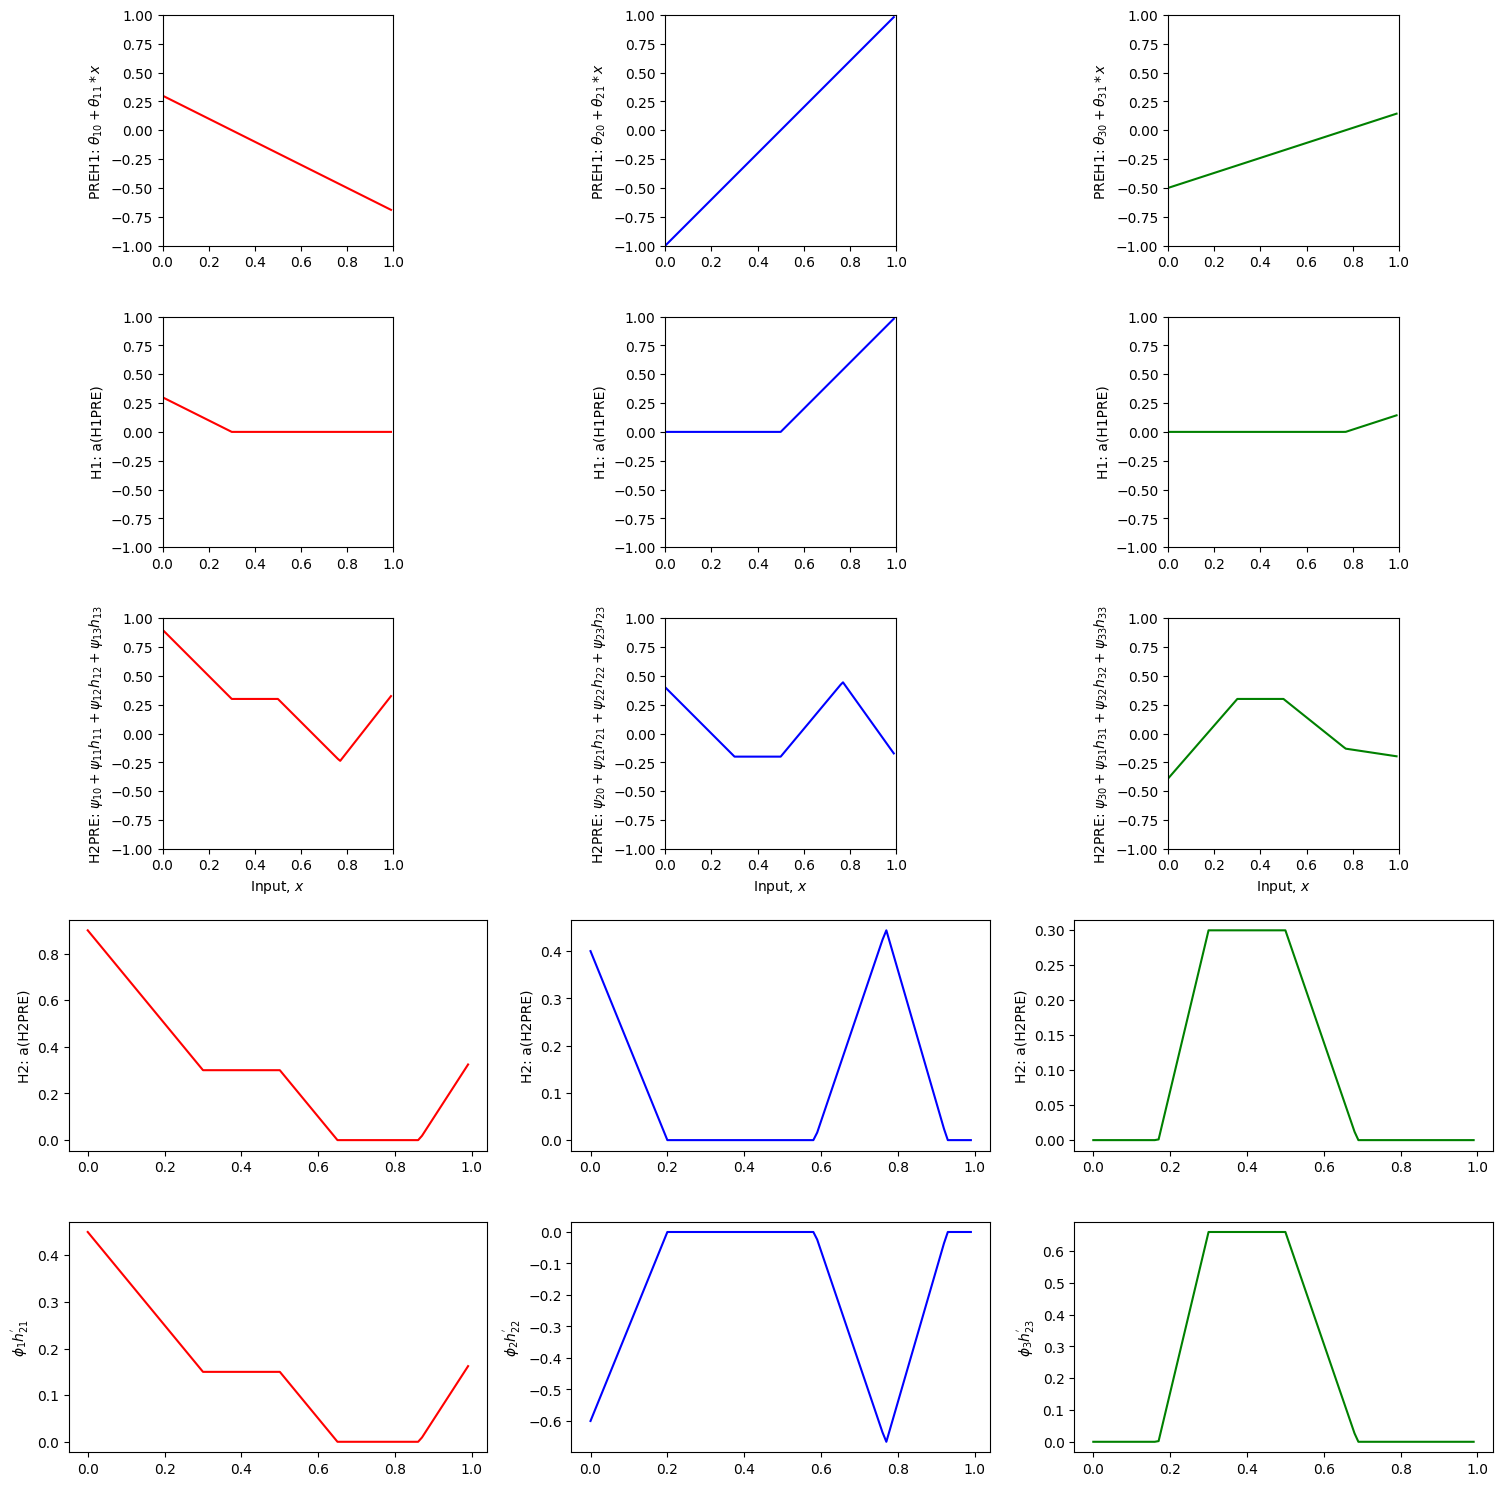

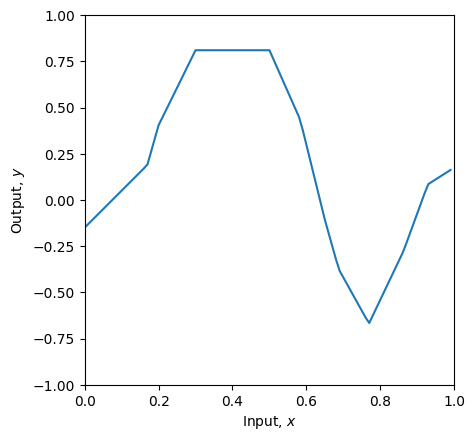

In [5]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
outputs = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, outputs)

To do:  To test your understanding of this, consider:

1.   What would happen if we increase $\psi_{1,0}$?
- The $\psi_{1,0}$ is bias, increasing it will move the y interception of the corresponding neuron. and then further down the forward pass it will be calculated accordingly.



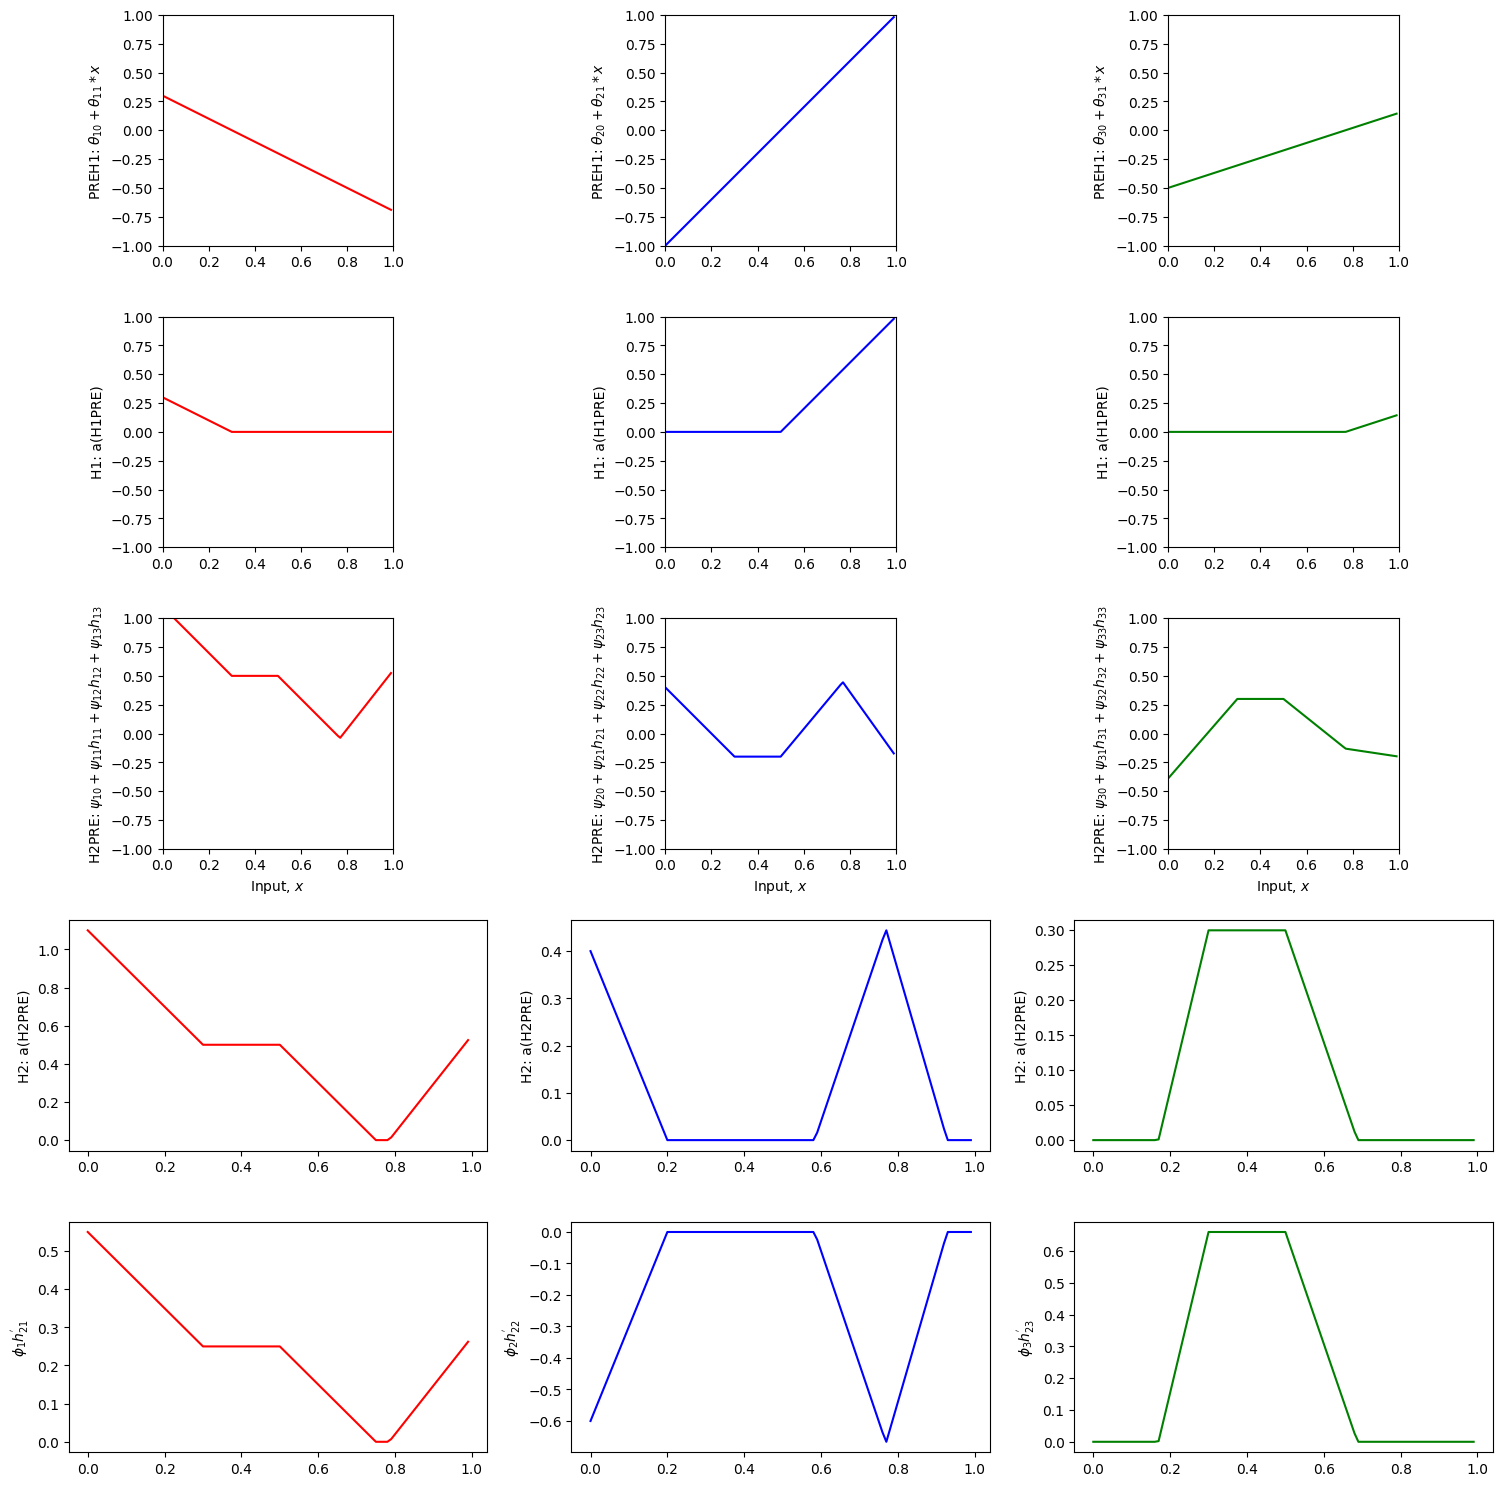

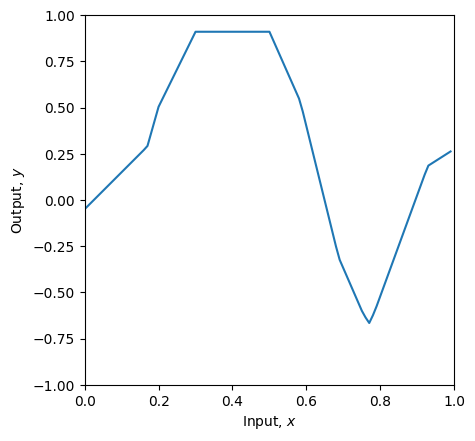

In [6]:
# Todo 1
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.5;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
outputs = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, outputs)

2.   What would happen if we multiplied $\psi_{2,0}, \psi_{2,1}, \psi_{2,2},  \psi_{2,3}$ by -1?
- the plot where this params are used will be inverted.


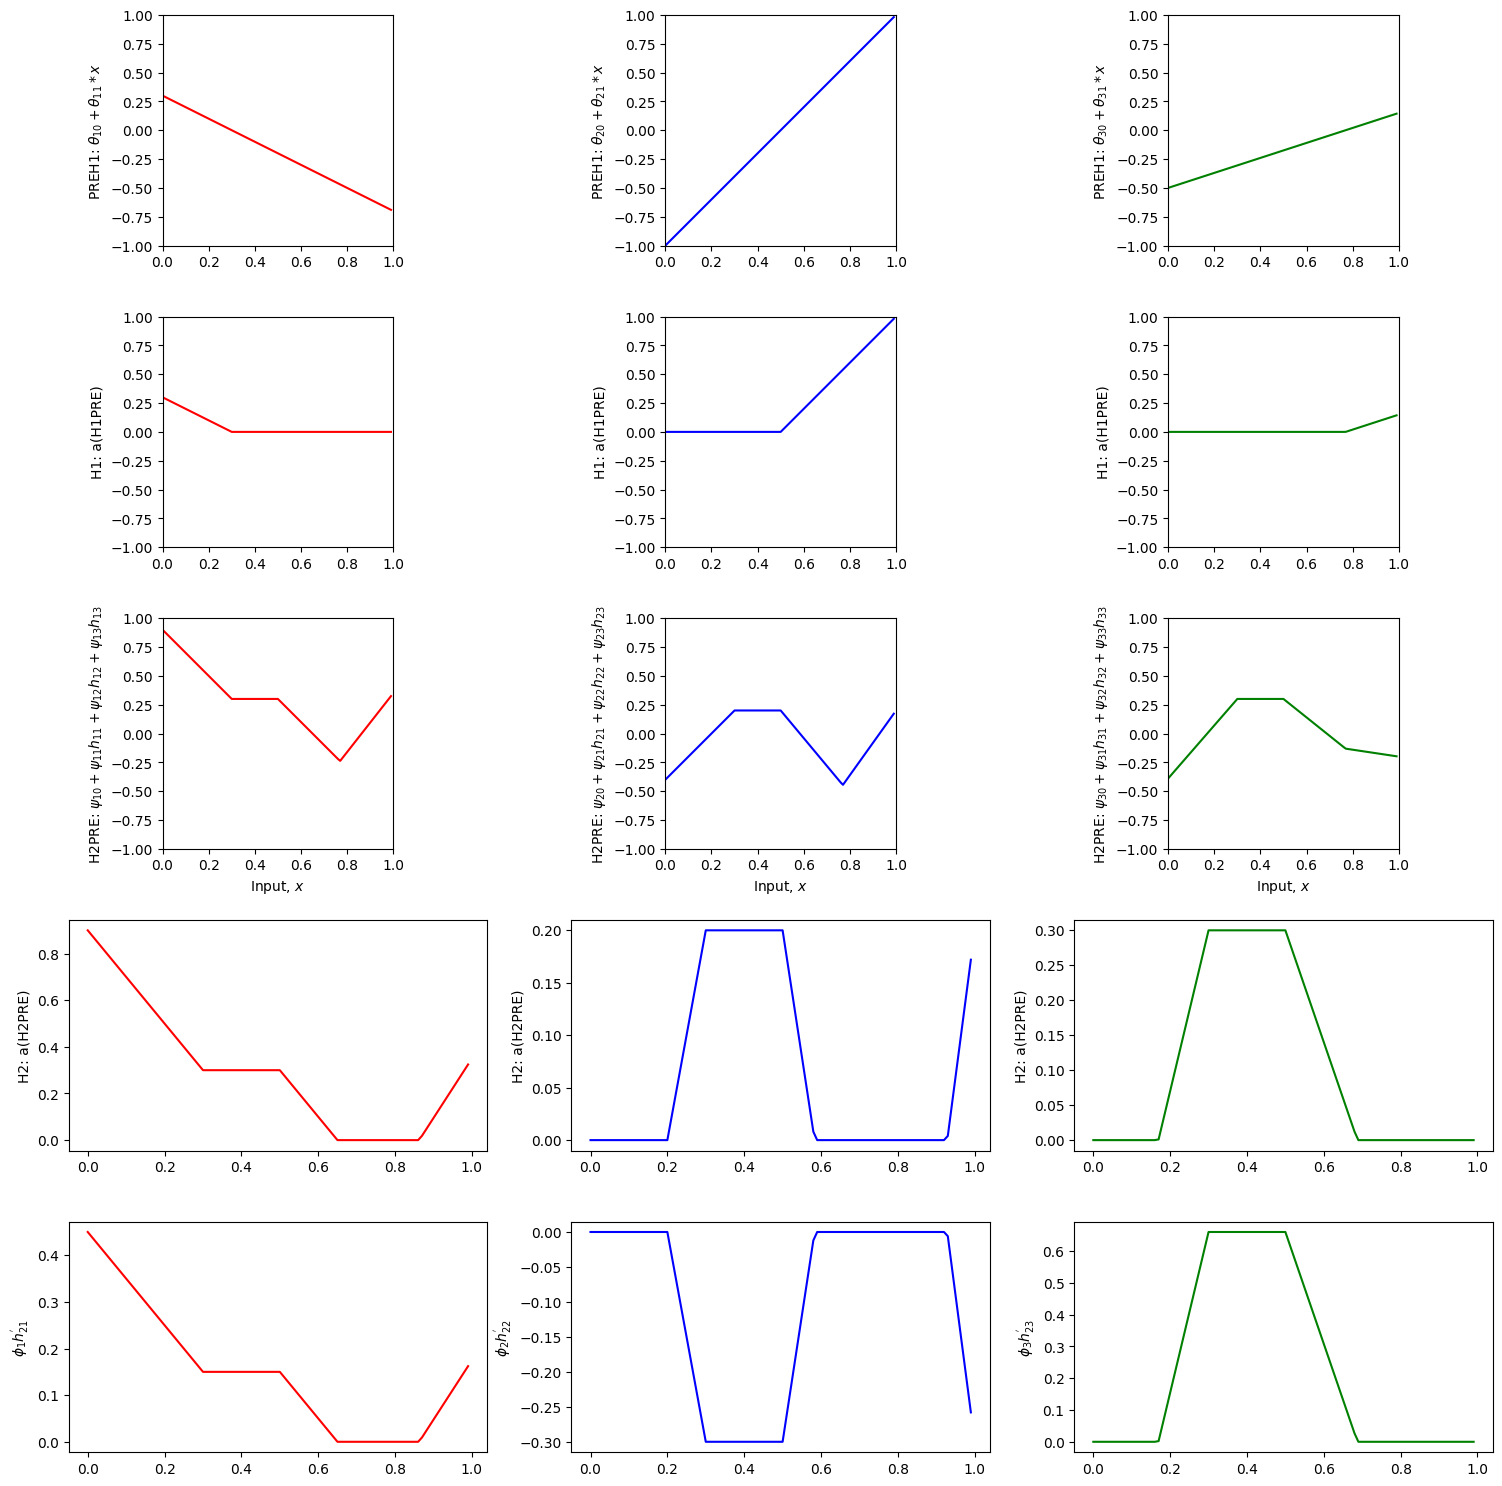

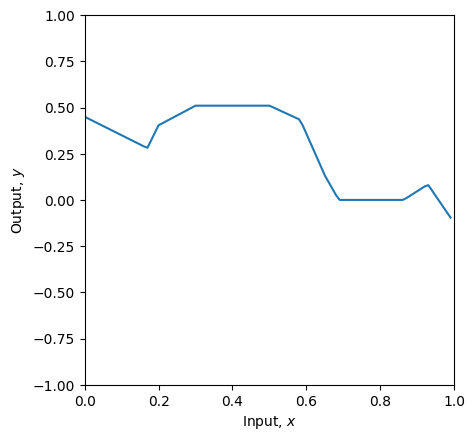

In [7]:
# Todo 2
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = 0.2;  psi[2,1] = -2.0; psi[2,2] = -1.2; psi[2,3]= 8.0 ################# *-1
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
outputs = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, outputs)

3.  What would happen if set $\phi_{3}$ to -1?
- Goes upside down as it is a multiplier

You can rerun the code to see if you were correct.

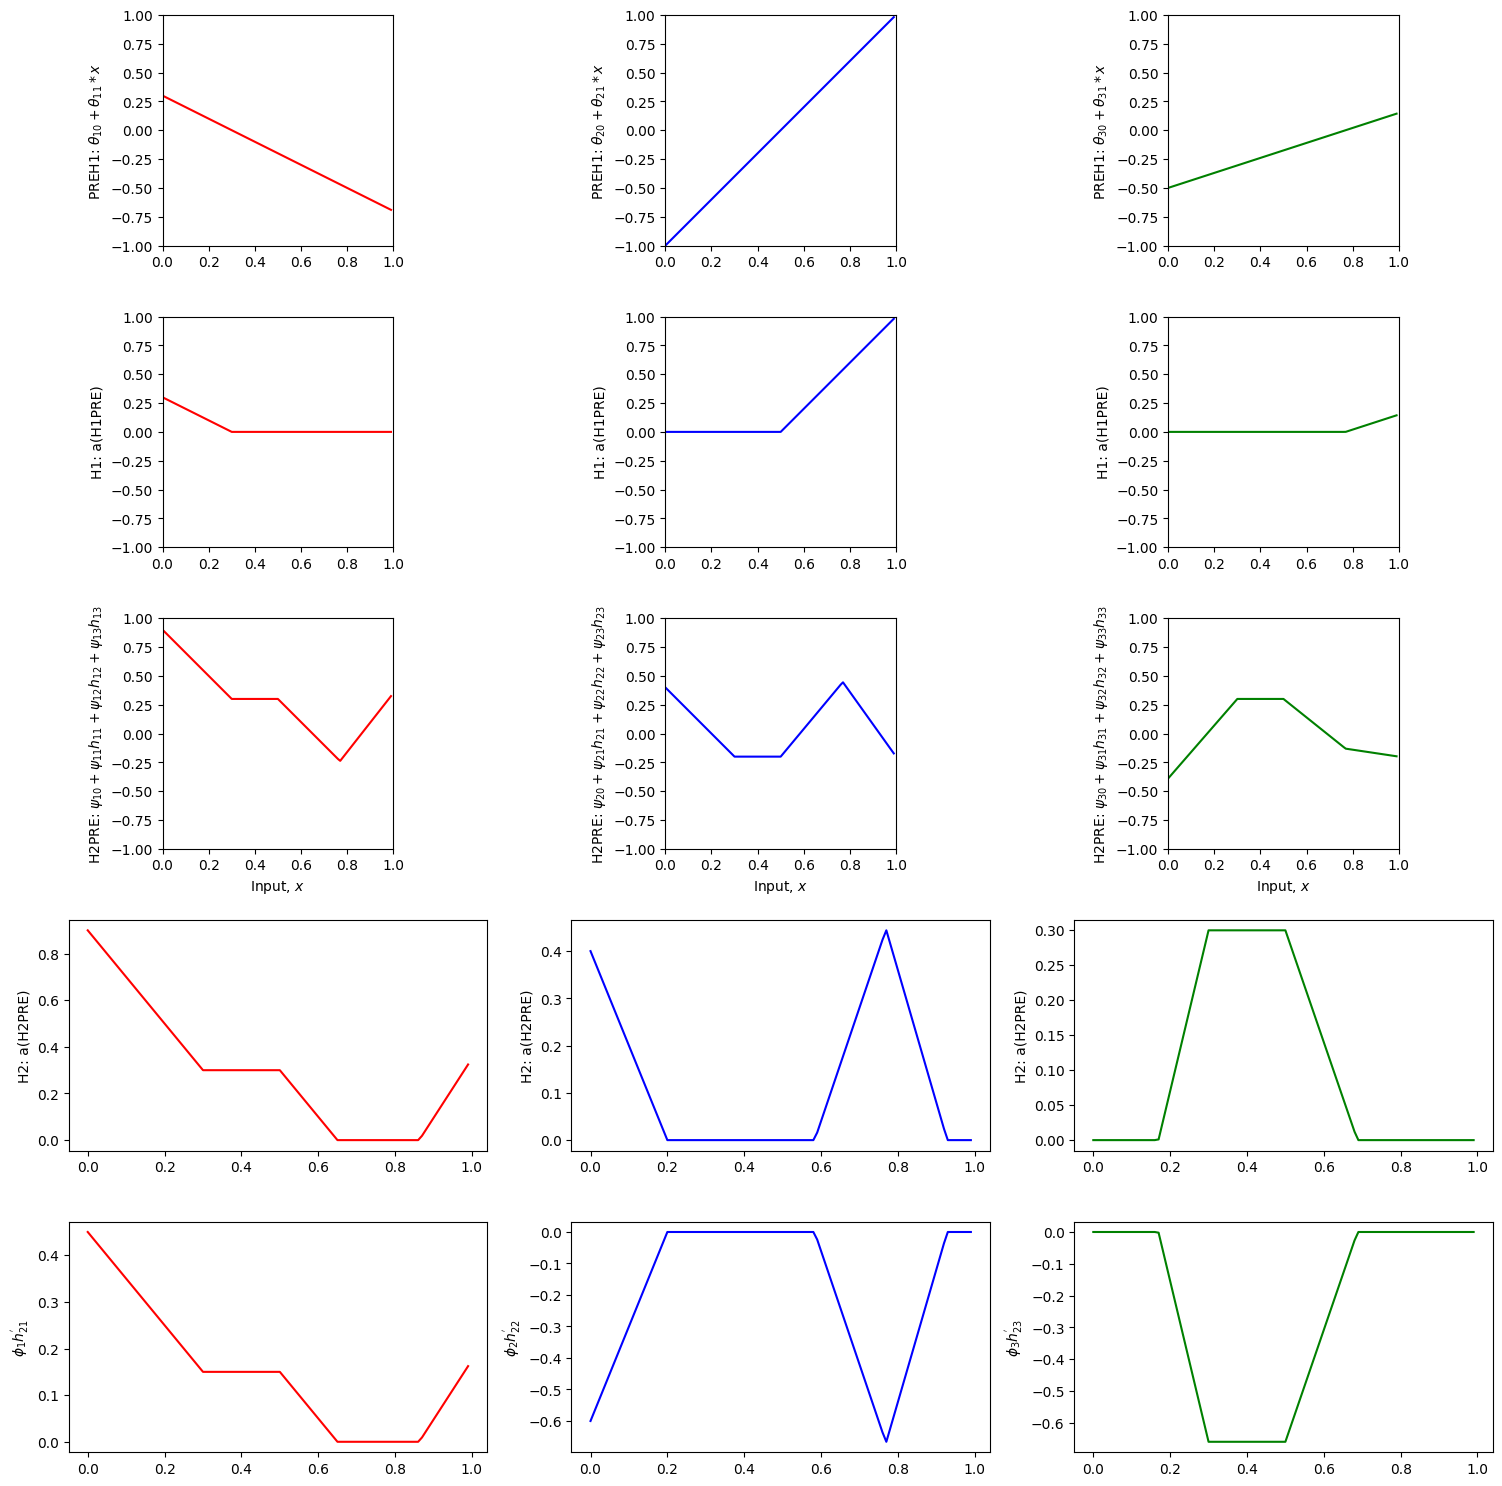

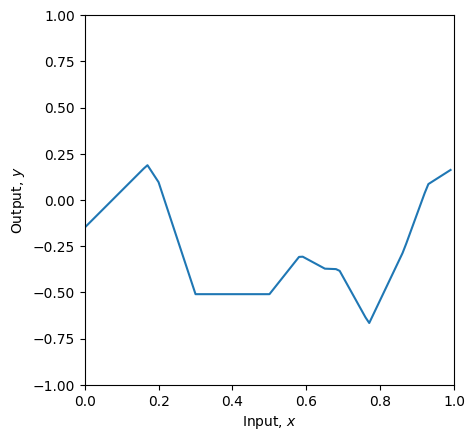

In [8]:
# Todo 3
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = -2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
outputs = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, outputs)